In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
def getData(stockName, period='5y', interval='1d'):
    return yf.download(tickers=stockName, period=period, interval=interval)

In [3]:
def calcReturn(df,ticker):
    df[f'Return_{ticker}']=np.log(df['Close'] / df['Close'].shift(1))
    return df[f'Return_{ticker}'].to_frame()

In [4]:
bist100 = ['AEFES','AGHOL','AKBNK','AKCNS','AKSA','AKSEN','ALARK',	'ALBRK',	'ALGYO',	'ALKIM',	'ARCLK',	'ARDYZ',	'ASELS',	'AYDEM',	'AYGAZ',	'BERA',	'BIMAS',	'BIOEN',	'BRISA',	'CANTE',	'CCOLA',	'CEMTS',	'CIMSA',	'DEVA',	'DOAS',	'DOHOL',	'ECILC',	'EGEEN',	'EKGYO',	'ENJSA',	'ENKAI',	'ERBOS',	'EREGL',	'ESEN',	'ESEN',	'FROTO',	'GARAN',	'GLYHO',	'GLYHO',	'GLYHO',	'GOZDE',	'GUBRF',	'HALKB',	'HEKTS',	'HEKTS',	'HEKTS',	'HLGYO',	'INDES',	'ISCTR',	'ISDMR',	'ISFIN',	'ISGYO',	'ISMEN',	'IZMDC',	'IZMDC',	'IZMDC',	'KARSN',	'KARTN',	'KCHOL',	'KERVT',	'KORDS',	'KOZAA',	'KOZAL',	'KRDMD',	'KRVGD',	'LOGO',	'MAVI',	'MGROS',	'MPARK',	'NETAS',	'ODAS',	'ODAS',	'ODAS',	'OTKAR',	'OYAKC',	'PARSN',	'PETKM',	'PGSUS',	'QUAGR',	'QUAGR',	'SAHOL',	'SARKY',	'SASA',	'SELEC',	'SISE',	'SKBNK',	'SKBNK',	'SOKM',	'TAVHL',	'TCELL',	'THYAO',	'TKFEN',	'TKNSA',	'TKNSA',	'TKNSA',	'TMSN',	'TOASO',	'TRGYO',	'TRILC',	'TSKB',	'TTKOM',	'TTRAK',	'TUPRS',	'TURSG',	'ULKER',	'VAKBN',	'VERUS',	'VESBE',	'VESTL',	'YATAS',	'YKBNK',	'ZOREN',	'ZOREN',	'ZRGYO']
bist100 = [s + '.IS' for s in bist100]

stc = ['XU100','XU030','AEFES','AKSEN','AKBNK', 'ARCLK','ASELS', 'BIMAS', 'DOHOL','ECILC', 'EKGYO', 'ENJSA', 'EREGL', 'FROTO', 'GARAN', 'GUBRF', 'HALKB',
       'HEKTS', 'ISGYO','ISCTR',
       'KARSN', 'KCHOL', 'KOZAA', 'KOZAL', 'KRDMD', 'MGROS', 'ODAS', 'OYAKC','PETKM', 'PGSUS', 'SAHOL', 'SASA', 'SISE', 'SKBNK',
       'SOKM', 'TAVHL',
       'TCELL', 'THYAO', 'TKFEN', 'TOASO', 'TSKB', 'TTKOM', 'TUPRS', 'VAKBN', 'VESTL', 'YKBNK']
stc = [x + '.IS' for x in stc]

In [5]:
dfs_to_concat = []
for i in stc:
    st = calcReturn(getData(i),i)
    dfs_to_concat.append(st)
    
df = pd.concat(dfs_to_concat, axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

# PCA

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [52]:
df=df.dropna()
#df_st = StandardScaler().fit_transform(df)

In [53]:
pca = PCA(n_components=2)
pc = pca.fit_transform(df_st)

In [54]:
pc

array([[-3.17559366,  0.92037945],
       [ 2.2529955 , -0.37879126],
       [-4.66499647, -0.4905907 ],
       ...,
       [-0.10586359,  0.64466625],
       [ 4.29841181,  0.51453441],
       [ 1.38848261, -0.38763174]])

In [55]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Displaying the explained variance
print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_variance)

Explained Variance Ratio: [0.40968561 0.05684459]
Cumulative Explained Variance: [0.40968561 0.46653021]


The Explained Variance Ratio in the context of Principal Component Analysis (PCA) provides an understanding of the proportion of the dataset's total variance that is "captured" by each principal component.

In simpler terms, it tells you how much information (variance) is captured by each principal component when you reduce the dimensionality of your data using PCA.

Interpretation:
Suppose you have 4 principal components with explained variance ratios as [0.5, 0.3, 0.1, 0.1].
The first principal component captures 50% of the total variance in the data.
The second captures 30%.
The third and fourth each capture 10%.
If you plot these values in a bar chart or a cumulative plot (often called a scree plot), you can visualize how much of the total information is retained by using a subset of the principal components.

Why It's Useful:
It helps you decide how many principal components to retain while ensuring that you still capture most of the variability in the data.
For instance, if the first two principal components have an explained variance ratio that adds up to 0.8 or 80%, it might be sufficient to just use those two components for further analysis, thus reducing the complexity of your model without sacrificing too much information.

The Cumulative Variance Ratio in PCA is the cumulative sum of the explained variance ratios for each principal component. It provides a measure of the total amount of variance in the data that is explained by the first n principal components.

Why It's Useful:
It helps you decide how many principal components to retain for your analysis. For instance, you might decide to choose the number of components that together explain at least 95% of the total variance.
By plotting the cumulative variance ratio, you can easily visualize the trade-off between retaining more components (and hence more information) and the simplicity of having fewer dimensions.

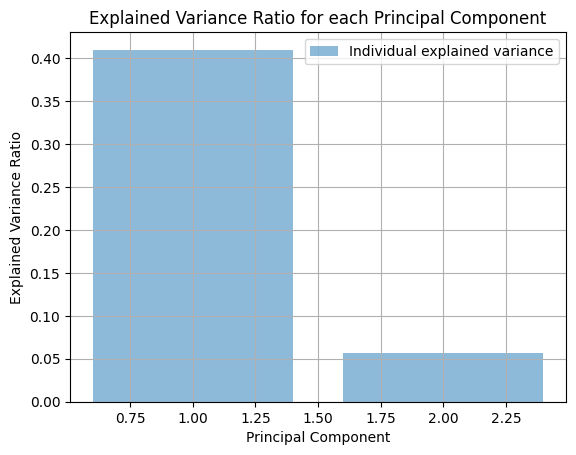

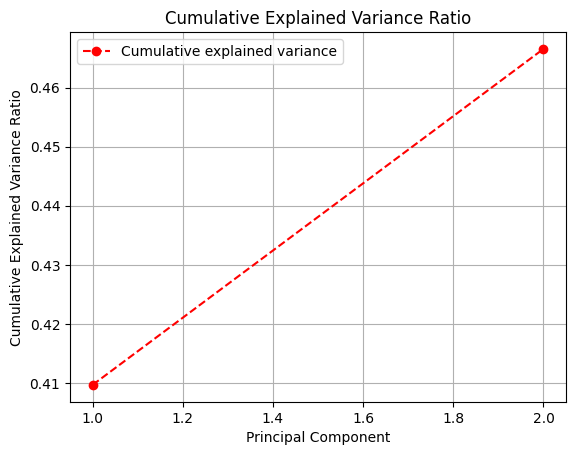

In [56]:
# Plot 1: Explained variance ratio
plt.figure()
plt.bar(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for each Principal Component')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Cumulative variance ratio
plt.figure()
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 
         marker='o', linestyle='--', color='red', label='Cumulative explained variance')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.show()

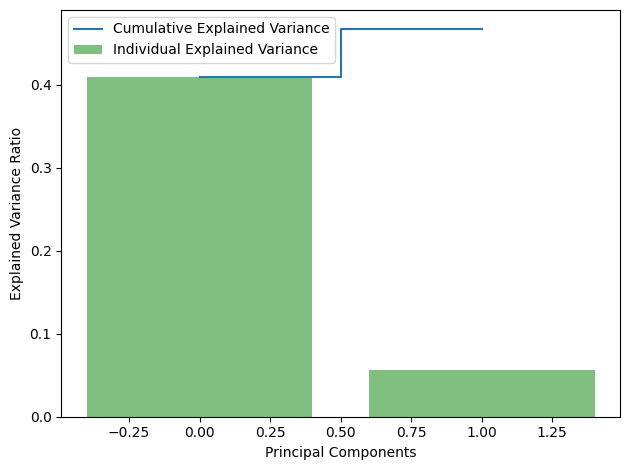

In [57]:
# Plotting the explained variance
plt.figure()

# Individual explained variance
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio, alpha=0.5, align='center', label='Individual Explained Variance', color='g')

# Cumulative explained variance
plt.step(range(len(cumulative_variance)), cumulative_variance, where='mid', label='Cumulative Explained Variance')

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [58]:
loadings = pca.components_

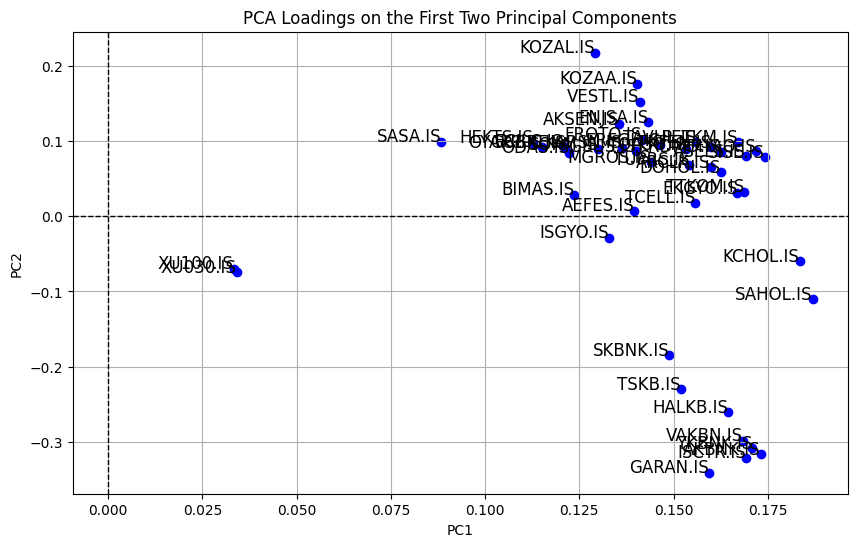

In [59]:
# Create a scatter plot of the loadings of the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(loadings[0], loadings[1], color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)

# Annotate the points
for i, txt in enumerate(stc):
    plt.annotate(txt, (loadings[0, i], loadings[1, i]), fontsize=12, ha='right')

plt.title("PCA Loadings on the First Two Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

In [60]:
# Get the loadings for each principal component
loadings = pca.components_

# Create a DataFrame to display the loadings
pc_names = [f'PC{i}' for i in range(1, len(loadings) + 1)]
loadings_df = pd.DataFrame(loadings.T, columns=pc_names, index=stc)

In [61]:
loadings_df

,PC1,PC2
XU100.IS,0.033346,-0.069871
XU030.IS,0.034120,-0.074132
AEFES.IS,0.139619,0.007622
AKSEN.IS,0.135554,0.122870
AKBNK.IS,0.173144,-0.317100
ARCLK.IS,0.159818,0.065211
ASELS.IS,0.169174,0.080045
BIMAS.IS,0.123707,0.028818
DOHOL.IS,0.162597,0.059037
ECILC.IS,0.120570,0.093412


Interpretation Guidelines:
High Positive or Negative Loading:

If a stock has a high positive loading (close to 1) for a particular principal component, it means that the stock has a strong positive influence on that component.
If a stock has a high negative loading (close to -1), it means that the stock has a strong negative influence on that component.
Low Loading (Close to Zero):

If a stock has a loading close to zero, it suggests that the stock doesn't have much influence on the principal component.
Comparison Across Components:

By comparing the loadings across different principal components, you can identify which stocks have a more significant influence on the variation captured by each component.

Conclusion:
By interpreting the loadings, you can gain insights into how combinations of stocks (principal components) capture different aspects of the variability in the dataset. It can be useful for identifying patterns, hedging strategies, and reducing dimensionality while preserving the most crucial information in the dataset.